In [1]:
import pandas as pd
import numpy as np

# 示例数据（实际值范围：x1[10,30], x2[20,40], x3[5,15])
df = pd.read_csv('y0.csv')
print(df)

       x1     x2     x3     y
0   48.11  66.08  28.11  3.04
1   48.11  66.08  51.89  4.53
2   48.11  83.92  28.11  1.59
3   48.11  83.92  51.89  3.22
4   71.89  66.08  28.11  4.35
5   71.89  66.08  51.89  7.25
6   71.89  83.92  28.11  2.42
7   71.89  83.92  51.89  4.85
8   40.00  75.00  40.00  2.84
9   80.00  75.00  40.00  5.36
10  60.00  60.00  40.00  5.68
11  60.00  90.00  40.00  2.91
12  60.00  75.00  20.00  1.43
13  60.00  75.00  60.00  5.21
14  60.00  75.00  40.00  4.33
15  60.00  75.00  40.00  4.20
16  60.00  75.00  40.00  4.35
17  60.00  75.00  40.00  4.36
18  60.00  75.00  40.00  4.23
19  60.00  75.00  40.00  4.46


In [2]:
def coded(col,ncol):
    # 定义条件和对应的值
    conditions = [
        (df[col] == df[col].min()),
        (df[col] > df[col].min()) & (df[col] < (df[col].min() + df[col].max())/2),
        (df[col] > (df[col].min() + df[col].max())/2) & (df[col] < df[col].max()),
        (df[col] == df[col].max())
    ]
    choices = [-1.682, -1, 1, 1.682]
    # 使用 np.select 创建新列
    df[ncol] = np.select(conditions, choices, default=0)
coded('x1','x1c')
coded('x2','x2c')
coded('x3','x3c')
print(df[['x1c','x2c','x3c']])

      x1c    x2c    x3c
0  -1.000 -1.000 -1.000
1  -1.000 -1.000  1.000
2  -1.000  1.000 -1.000
3  -1.000  1.000  1.000
4   1.000 -1.000 -1.000
5   1.000 -1.000  1.000
6   1.000  1.000 -1.000
7   1.000  1.000  1.000
8  -1.682  0.000  0.000
9   1.682  0.000  0.000
10  0.000 -1.682  0.000
11  0.000  1.682  0.000
12  0.000  0.000 -1.682
13  0.000  0.000  1.682
14  0.000  0.000  0.000
15  0.000  0.000  0.000
16  0.000  0.000  0.000
17  0.000  0.000  0.000
18  0.000  0.000  0.000
19  0.000  0.000  0.000


In [3]:
from sklearn.preprocessing import PolynomialFeatures

# 生成二次多项式特征（包含交互项和平方项）
poly = PolynomialFeatures(degree=2, include_bias=False)
# 编码值
X_poly1 = poly.fit_transform(df[['x1c', 'x2c', 'x3c']])
feature_names1 = poly.get_feature_names_out(['x1c', 'x2c', 'x3c'])
df_poly1 = pd.DataFrame(X_poly1, columns=feature_names1)
print("\n多项式特征矩阵：\n", df_poly1.head().round(2))
# 未编码值
X_poly2 = poly.fit_transform(df[['x1', 'x2', 'x3']])
feature_names2 = poly.get_feature_names_out(['x1', 'x2', 'x3'])
df_poly2 = pd.DataFrame(X_poly2, columns=feature_names2)
print("\n多项式特征矩阵：\n", df_poly2.head().round(2))


多项式特征矩阵：
    x1c  x2c  x3c  x1c^2  x1c x2c  x1c x3c  x2c^2  x2c x3c  x3c^2
0 -1.0 -1.0 -1.0    1.0      1.0      1.0    1.0      1.0    1.0
1 -1.0 -1.0  1.0    1.0      1.0     -1.0    1.0     -1.0    1.0
2 -1.0  1.0 -1.0    1.0     -1.0      1.0    1.0     -1.0    1.0
3 -1.0  1.0  1.0    1.0     -1.0     -1.0    1.0      1.0    1.0
4  1.0 -1.0 -1.0    1.0     -1.0     -1.0    1.0      1.0    1.0

多项式特征矩阵：
       x1     x2     x3     x1^2    x1 x2    x1 x3     x2^2    x2 x3     x3^2
0  48.11  66.08  28.11  2314.57  3179.11  1352.37  4366.57  1857.51   790.17
1  48.11  66.08  51.89  2314.57  3179.11  2496.43  4366.57  3428.89  2692.57
2  48.11  83.92  28.11  2314.57  4037.39  1352.37  7042.57  2358.99   790.17
3  48.11  83.92  51.89  2314.57  4037.39  2496.43  7042.57  4354.61  2692.57
4  71.89  66.08  28.11  5168.17  4750.49  2020.83  4366.57  1857.51   790.17


In [4]:
import statsmodels.api as sm

# 添加常数项并拟合模型
X_sm1 = sm.add_constant(df_poly1)
y = df['y']
model1 = sm.OLS(y, X_sm1)
results1 = model1.fit()
# 输出回归结果摘要
print("\n编码回归分析摘要：")
print(results1.summary())
# 添加常数项并拟合模型
X_sm2 = sm.add_constant(df_poly2)
model2 = sm.OLS(y, X_sm2)
results2 = model2.fit()
# 输出回归结果摘要
print("\n未编码回归分析摘要：")
print(results2.summary())


编码回归分析摘要：
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     308.5
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           5.03e-11
Time:                        09:44:03   Log-Likelihood:                 21.650
No. Observations:                  20   AIC:                            -23.30
Df Residuals:                      10   BIC:                            -13.34
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3208      0.047     91.3

In [5]:
# 实际值模型评估与诊断
print(f"\nR²: {results2.rsquared:.4f}")
print(f"调整R²: {results2.rsquared_adj:.4f}")
print("\n系数估计与显著性：")
coeff_table = pd.DataFrame({
    '系数': results2.params.round(2),
    '标准误': results2.bse.round(2),
    't值': results2.tvalues.round(2),
    'p值': results2.pvalues.round(6)
})
print(coeff_table)


R²: 0.9964
调整R²: 0.9932

系数估计与显著性：
         系数   标准误     t值        p值
const -6.93  3.27  -2.12  0.060231
x1     0.19  0.04   4.64  0.000926
x2     0.04  0.06   0.58  0.571998
x3     0.20  0.04   5.27  0.000365
x1^2  -0.00  0.00  -2.39  0.038279
x1 x2 -0.00  0.00  -4.79  0.000734
x1 x3  0.00  0.00   6.74  0.000051
x2^2  -0.00  0.00  -0.13  0.901856
x2 x3 -0.00  0.00  -1.01  0.337730
x3^2  -0.00  0.00 -11.42  0.000000


In [6]:
# 多重共线性检查（VIF）
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算方差膨胀因子 (VIF)
vif_data = pd.DataFrame()
vif_data["特征"] = X_sm2.columns
vif_data["VIF"] = [variance_inflation_factor(X_sm2.values, i) for i in range(X_sm2.shape[1])]
print("\n方差膨胀因子 (VIF)：\n", vif_data)


方差膨胀因子 (VIF)：
       特征           VIF
0  const  15950.001139
1     x1    237.513631
2     x2    331.838835
3     x3    208.063258
4   x1^2     97.506227
5  x1 x2    165.169639
6  x1 x3     63.800484
7   x2^2    269.071211
8  x2 x3    141.021215
9   x3^2     43.901822


In [7]:
coefficients = results2.params  # 从回归结果中提取系数

# 分离线性项和二次项系数
b0 = coefficients['const']
b_linear = coefficients[['x1', 'x2', 'x3']].values  # 线性项系数
b_quad = coefficients[['x1^2', 'x2^2', 'x3^2']].values  # 二次项系数
b_interaction = coefficients[['x1 x2', 'x1 x3', 'x2 x3']].values  # 交互项系数
b0,b_linear,b_quad,b_interaction

(np.float64(-6.930564471652563),
 array([0.18845797, 0.03741327, 0.20029401]),
 array([-5.14819605e-04, -4.85310771e-05, -2.46481960e-03]),
 array([-0.00185039,  0.00195406, -0.00038894]))

In [8]:
# 构建矩阵b和B
import numpy as np

k = 3  # 因子数量
b = b_linear.reshape(-1, 1)  # 转为列向量

# 构建对称矩阵B
B = np.zeros((k, k))
np.fill_diagonal(B, b_quad)  # 对角线为二次项系数
B[0, 1] = B[1, 0] = b_interaction[0] / 2  # x1x2
B[0, 2] = B[2, 0] = b_interaction[1] / 2  # x1x3
B[1, 2] = B[2, 1] = b_interaction[2] / 2  # x2x3

In [9]:
# 求解驻点：xs = -0.5 * B^{-1} * b
B_inv = np.linalg.inv(B)
xs = -0.5 * np.dot(B_inv, b)

print("驻点坐标:\n", pd.DataFrame(xs, index=['x1', 'x2', 'x3'], columns=['Stationary Point']))

驻点坐标:
     Stationary Point
x1          6.383061
x2        132.809536
x3         32.682435


In [10]:
eigenvalues = np.linalg.eigvals(B)

if all(eig > 0 for eig in eigenvalues):
    print("驻点为最小值点")
elif all(eig < 0 for eig in eigenvalues):
    print("驻点为最大值点")
else:
    print("驻点为鞍点")

驻点为鞍点


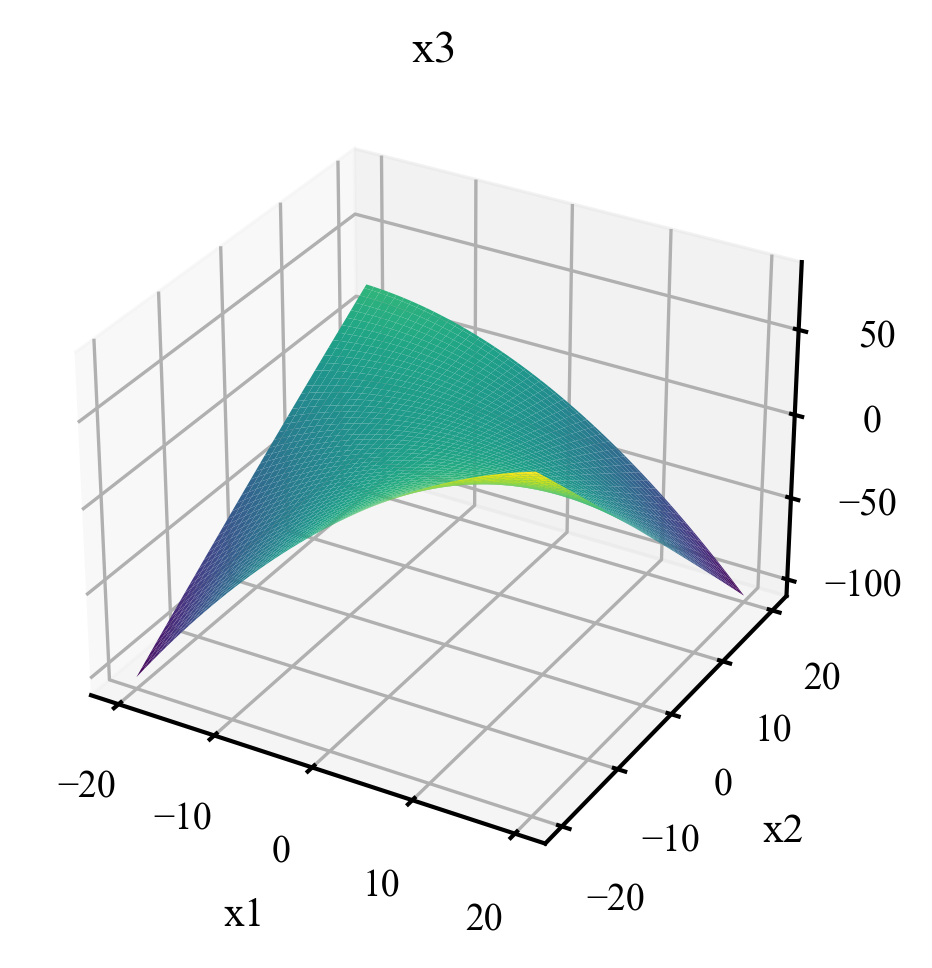

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from my_style import set_journal_style
set_journal_style()
coefficients = results1.params  # 从回归结果中提取系数

# 分离线性项和二次项系数
b01 = coefficients['const']
b_linear1 = coefficients[['x1c', 'x2c', 'x3c']].values  # 线性项系数
b_quad1 = coefficients[['x1c^2', 'x2c^2', 'x3c^2']].values  # 二次项系数
b_interaction1 = coefficients[['x1c x2c', 'x1c x3c', 'x2c x3c']].values  # 交互项系数

# 示例：固定x3=中心值，绘制x1-x2响应面
x1_range = np.linspace(-20, 20, 100)  # 编码值范围
x2_range = np.linspace(-20, 20, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
X3 = np.zeros_like(X1)  # 固定x3=0（编码值中心）

# 计算预测值（需根据模型调整）
Y = (b01 + b_linear1[0]*X1 + b_linear1[1]*X2 + b_linear1[2]*X3 + 
     b_quad1[0]*X1**2 + b_quad1[1]*X2**2 + b_quad1[2]*X3**2 +
     b_interaction1[0]*X1*X2 + b_interaction1[1]*X1*X3 + b_interaction1[2]*X2*X3)

# 绘制3D曲面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('x3')
plt.show()

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 假设已有拟合结果 results_coded (编码值模型)
coef = results2.params
b0 = coef['const']
b_linear = coef[['x1', 'x2', 'x3']].values
b_quad = coef[['x1^2', 'x2^2', 'x3^2']].values
b_interaction = coef[['x1 x2', 'x1 x3', 'x2 x3']].values

# 构建B矩阵（Hessian矩阵）
k = 3
B = np.zeros((k, k))
np.fill_diagonal(B, b_quad)
B[0, 1] = B[1, 0] = b_interaction[0] / 2
B[0, 2] = B[2, 0] = b_interaction[1] / 2
B[1, 2] = B[2, 1] = b_interaction[2] / 2
print(coef,b0,b_linear,b_quad,b_interaction)
print(B*100)

const   -6.930564
x1       0.188458
x2       0.037413
x3       0.200294
x1^2    -0.000515
x1 x2   -0.001850
x1 x3    0.001954
x2^2    -0.000049
x2 x3   -0.000389
x3^2    -0.002465
dtype: float64 -6.930564471652563 [0.18845797 0.03741327 0.20029401] [-5.14819605e-04 -4.85310771e-05 -2.46481960e-03] [-0.00185039  0.00195406 -0.00038894]
[[-0.05148196 -0.09251943  0.09770315]
 [-0.09251943 -0.00485311 -0.01944676]
 [ 0.09770315 -0.01944676 -0.24648196]]


In [13]:
# 编码参数
x1_center, x1_step = 60, 20  # x1: [40,80]
x2_center, x2_step = 75, 15  # x2: [60,90]
x3_center, x3_step = 40, 20  # x3: [20,60]
# 特征值分析
eigenvalues = np.linalg.eigvals(B)
print("特征值:", eigenvalues)
print("驻点类型: 鞍点" if any(eig > 0 for eig in eigenvalues) and any(eig < 0 for eig in eigenvalues) else "")

特征值: [ 0.00085482 -0.00100075 -0.00288224]
驻点类型: 鞍点


In [14]:
# 岭分析设置
radii = np.linspace(0, 2, 200)  # 编码半径范围
results = []

# 优化目标函数（最大化响应值）
def objective(x):
    return -(b0 + np.dot(b.T, x) + x.T @ B @ x).item()

# 约束条件：x1^2 + x2^2 + x3^2 = r^2
def radius_constraint(x, r):
    return np.sum(x**2) - r**2

In [15]:
# 执行岭分析
for r in radii:
    cons = {'type': 'eq', 'fun': lambda x, r=r: radius_constraint(x, r)}
    
    # 使用驻点作为初始值
    x0 = xs.copy().flatten()

    # 执行优化
    res = minimize(
        objective, 
        x0, 
        method='SLSQP',
        constraints=cons,
        options={'maxiter': 1000}
    )
    
    if res.success:
        # 获取最优解
        x_opt = res.x
        y_opt = -res.fun
        
        # 转换为实际值
        x1_real = x1_center + x_opt[0] * x1_step
        x2_real = x2_center + x_opt[1] * x2_step
        x3_real = x3_center + x_opt[2] * x3_step
        
        results.append([r, y_opt, x1_real, x2_real, x3_real])
    else:
        print(f"半径 {r:.2f} 优化失败")

# 创建DataFrame
df_ridge = pd.DataFrame(
    results,
    columns=['编码半径', '估计响应', 'x1', 'x2', 'x3']
)

# 设置显示精度
pd.options.display.float_format = '{:.4f}'.format

print("\n岭分析结果表:")
print(df_ridge.loc[df_ridge['x1']<80])


岭分析结果表:
      编码半径    估计响应      x1      x2      x3
0   0.0000 -6.9306 60.0002 75.0000 40.0002
1   0.0101 -6.9278 60.1374 75.0213 40.1440
2   0.0201 -6.9250 60.2731 75.0406 40.2900
3   0.0302 -6.9222 60.4095 75.0610 40.4351
4   0.0402 -6.9194 60.5462 75.0809 40.5800
..     ...     ...     ...     ...     ...
141 1.4171 -6.5388 79.4456 77.7140 60.2984
142 1.4271 -6.5360 79.5836 77.7322 60.4426
143 1.4372 -6.5332 79.7215 77.7502 60.5868
144 1.4472 -6.5305 79.8595 77.7683 60.7310
145 1.4573 -6.5277 79.9975 77.7864 60.8752

[146 rows x 5 columns]
